In [42]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_classification
from sklearn.datasets import make_blobs
from matplotlib.pylab import plt
from sklearn.decomposition import PCA
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
%matplotlib inline
import numpy as np

# Part I. Crime statistics

Crime Rate in 47 states of the USA with 13 explanatory variables  
The crime rate (**Y**) in 47 states in the U.S. was reported together with possible factors that might influence it. The factors recorded are as follows;  
X1 = the number of males aged 14 - 24 per 1000 of total state population  
X2 = binary variable distinguishing southern states (X2 =1) from the rest (X2=0).  
X3 = the mean number of years of schooling x 10 of the population, 25 years old and over  
X4 = police expenditure (in dollars) per person by state and local government in 1960  
X5 = police expenditure (in dollars) per person by state and local government in 1959  
X6 = labour force participation rate per 1000 civilian urban males in the age group 14-24  
X7 = the number of males per 1000 females  
X8 = state population size in hundred thousands  
X9 = unemployment rate of urban males per 1000 in the age group 14-24    
X10 = unemployment rate of urban males per 1000 in the age group 35-59.  
X11 = the median value of family income or transferable goods and assets (unit 10 dollars)  
X12 = the number of families per 1000 earning below one-half of the median income.  

In [33]:
data = pd.read_excel('Crime.xlsx')

In [52]:
features = ['males','south','yrsSch','policExp60','policeExp59','labour',
           'M/F','statePop','unemp14','unemp35','income','proverty']

In [35]:
data.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,Y
0,151,1,91,58,56,510,950,33,108,41,394,261,79.1
1,143,0,113,103,95,583,1012,13,96,36,557,194,163.5
2,142,1,89,45,44,533,969,18,94,33,318,250,57.8
3,136,0,121,149,141,577,994,157,102,39,673,167,196.9
4,141,0,121,109,101,591,985,18,91,20,578,174,123.4


## Q1. Report the correlation coefficients between each feature and the output variable Y (crimes per 100.000)
## Q2. Look at the impact of each feature separately (on all 47 observations)
    # Fit bi-variate regressions and report the estimate as well as the p-values
## Q3. Take for the further consideration only those which have correlation coefficient with Y above 60%
    # Fit the multi-variate regression with them, report statistics
## Q4. Run cross-validation with the regressors in Q3, report the Out-of-sample R2 (OS R2)
    # Put 2/3 observations on average into training set and the remaining 1/3 into test set
    # Run it 1000 times, obtain the average value

### Solution

Q1

In [56]:
for i in range(1,13):
  print('corr(Y,X%d)=%f' % (i,np.corrcoef(data.Y,data['X%d' % i])[0,1]))

corr(Y,X1)=-0.089472
corr(Y,X2)=-0.090637
corr(Y,X3)=0.322835
corr(Y,X4)=0.687604
corr(Y,X5)=0.666714
corr(Y,X6)=0.188866
corr(Y,X7)=0.213914
corr(Y,X8)=0.337474
corr(Y,X9)=-0.050478
corr(Y,X10)=0.177321
corr(Y,X11)=0.441320
corr(Y,X12)=-0.179024


Q2

In [39]:
for i in range(1,13):
  lm = smf.ols(formula='Y ~ X%d' % i, data = data).fit()
  print('X%d: R2=%f, p-value=%f, model: Y~%f*X%d+%f' % (i,lm.rsquared,lm.pvalues[1],lm.params[1],i,lm.params[0]))

X1: R2=0.008005, p-value=0.549789, model: Y~-0.275347*X1+128.664557
X2: R2=0.008215, p-value=0.544586, model: Y~-7.318750*X2+93.000000
X3: R2=0.104222, p-value=0.026878, model: Y~1.116121*X3+-27.396654
X4: R2=0.472800, p-value=0.000000, model: Y~0.894848*X4+14.446398
X5: R2=0.444508, p-value=0.000000, model: Y~0.922203*X5+16.516424
X6: R2=0.035670, p-value=0.203581, model: Y~0.180755*X6+-10.929773
X7: R2=0.045759, p-value=0.148794, model: Y~0.280765*X7+-185.489484
X8: R2=0.113889, p-value=0.020351, model: Y~0.342838*X8+77.954816
X9: R2=0.002548, p-value=0.736150, model: Y~-0.108288*X9+100.846541
X10: R2=0.031443, p-value=0.233108, model: Y~0.812047*X10+62.916195
X11: R2=0.194763, p-value=0.001902, model: Y~0.176893*X11+-2.428261
X12: R2=0.032049, p-value=0.228577, model: Y~-0.173550*X12+124.177253


In [ ]:
Q3

In [57]:
lm = smf.ols(formula='Y ~ X4+X5', data = data).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.494
Model:                            OLS   Adj. R-squared:                  0.471
Method:                 Least Squares   F-statistic:                     21.48
Date:                Mon, 30 Oct 2017   Prob (F-statistic):           3.09e-07
Time:                        23:43:59   Log-Likelihood:                -221.97
No. Observations:                  47   AIC:                             449.9
Df Residuals:                      44   BIC:                             455.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     15.8265     12.593      1.257      0.2

In [58]:
# Using cross validation.
R_IS=[]
R_OS=[]

# Why we need this? let's set n=1 and run several times to see.
n=1000

for i in range(n):
    train, test = train_test_split(data, test_size = 0.33)
    lm = smf.ols(formula='Y~X4+X5',data=train).fit()
    R_IS.append(lm.rsquared)
    lmy = lm.predict(test)
    y_err = lmy - test.Y
    y_norm = test.Y-np.mean(test.Y)
    R2 = 1-y_err.dot(y_err)/y_norm.dot(y_norm)
    R_OS.append(R2)
print("IS R^2 for {} times is {}".format(n,np.mean(R_IS)))
print("OS R-squared for {} times is {}".format(n,np.mean(R_OS)))

IS R^2 for 1000 times is 0.498623443536
OS R-squared for 1000 times is 0.236475459597


In [51]:
# Using cross validation.
R_IS=[]
R_OS=[]

# Why we need this? let's set n=1 and run several times to see.
n=1000

for i in range(n):
    train, test = train_test_split(data, test_size = 0.33)
    lm = smf.ols(formula='Y~X4+X5',data=train).fit()
    R_IS.append(lm.rsquared)
    lmy = lm.predict(test)
    y_err = lmy - test.Y
    y_norm = test.Y-np.mean(test.Y)
    R2 = 1-y_err.dot(y_err)/y_norm.dot(y_norm)
    R_OS.append(R2)
print("IS R^2 for {} times is {}".format(n,np.mean(R_IS)))
print("OS R-squared for {} times is {}".format(n,np.mean(R_OS)))

IS R^2 for 1000 times is 0.499519367538
OS R-squared for 1000 times is 0.245806552747


#  Part II. Learning Seattle's Work Habits from Bicycle Counts


The data we will use here are the hourly bicycle counts on Seattle's Fremont Bridge. These data come from an automated bicycle counter, installed in late 2012, which has inductive sensors under the sidewalks on either side of the bridge. The daily or hourly bicycle counts can be downloaded from http://data.seattle.gov/; here is the direct link to the hourly dataset. To download the data directly, you can uncomment the following curl command:

In [60]:
data = pd.read_csv("Bridge.csv", index_col='Date', parse_dates=True)
data=data.iloc[:-12000,:]
data.tail()

#We'll do some quick data cleaning: 
#we'll rename the columns to the shorter "West" and "East", 
#set any missing values to zero, and add a "Total" column:
data.columns = ['West', 'East']
data.fillna(0, inplace=True)
data['Total'] = data.eval('East + West')

In [61]:
data.head()

,West,East,Total
Date,,,
2012-10-03 00:00:00,4.0,9.0,13.0
2012-10-03 01:00:00,4.0,6.0,10.0
2012-10-03 02:00:00,1.0,1.0,2.0
2012-10-03 03:00:00,2.0,3.0,5.0
2012-10-03 04:00:00,6.0,1.0,7.0


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).sum()
  if __name__ == '__main__':


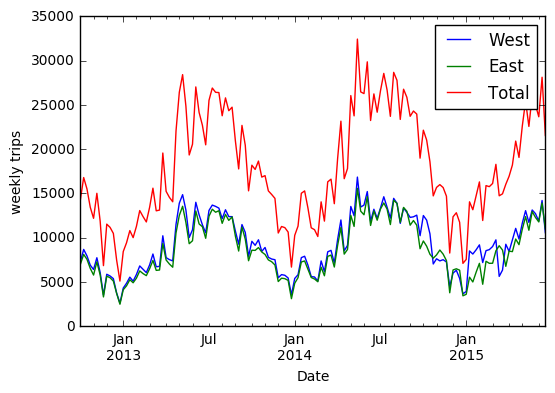

In [62]:
data.resample('W', how='sum').plot()
plt.ylabel('weekly trips');

In [63]:
pivoted = data.pivot_table(['East', 'West'],
                           index=data.index.date,
                           columns=data.index.hour,
                           fill_value=0)
pivoted.head()

East                                      ... West                 \
             0  1  2    3  4   5   6    7    8    9  ...   14   15   16   17   
2012-10-03    9  6  1  3.0  1  10  50   95  146  104 ...   77   72  133  192   
2012-10-04   11  0  6  3.0  1  11  51   89  134   94 ...   63   73  114  154   
2012-10-05    7  4  3  2.0  2   7  37  101  119   81 ...   63   80  120  144   
2012-10-06    7  5  2  2.0  1   2  15   16   47   55 ...   89  115  107  107   
2012-10-07    5  5  1  2.0  2   3   8   12   26   36 ...  126  122  132  118   

                                     
             18  19  20  21  22  23  
2012-10-03  122  59  29  25  24   5  
2012-10-04  137  57  27  31  25  11  
2012-10-05  107  42  27  11  10  16  
2012-10-06   41  40  25  18  14  15  
2012-10-07   68  26  19  12   9   5  

[5 rows x 48 columns]

In [64]:
X = pivoted.values
X.shape

(990, 48)

In [65]:
X

array([[  9.,   6.,   1., ...,  25.,  24.,   5.],
       [ 11.,   0.,   6., ...,  31.,  25.,  11.],
       [  7.,   4.,   3., ...,  11.,  10.,  16.],
       ..., 
       [  6.,   5.,   2., ...,  44.,  35.,  21.],
       [ 12.,   2.,   4., ...,  40.,  17.,   9.],
       [ 18.,   2.,   1., ...,  38.,  32.,  28.]])

## Q5. 

Visualize the data using PCA (two dimensions). Color the points by the day of the week

In [66]:
Xn=X
for i in range(0,990):
  Xn[i]=X[i]/sum(X[i])

In [67]:
from sklearn.decomposition import PCA
Xpca = PCA(2).fit_transform(Xn)
Xpca.shape

(990, 2)

In [68]:
dayofweek = pd.to_datetime(pivoted.index).dayofweek

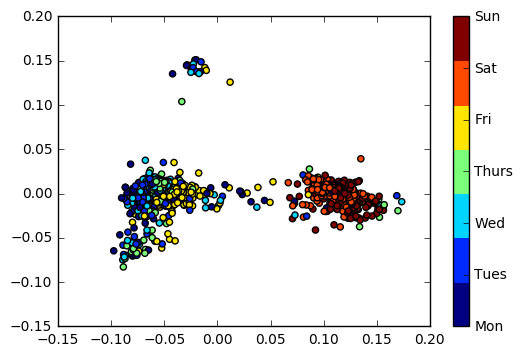

In [69]:
plt.scatter(Xpca[:, 0], Xpca[:, 1], c=dayofweek,
            cmap=plt.cm.get_cmap('jet', 7))
cb = plt.colorbar(ticks=range(7))
cb.set_ticklabels(['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun'])
